# Supervised learning - Classification

In [1]:
%pylab
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

import numpy as np

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


### Logistical regression 

We are going to make a logistical regression with scikit-learn. This library have the `make_classification()` method to create a random dataset, and we are going to use it:

In [2]:
from sklearn.datasets              import make_classification
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.metrics               import confusion_matrix
from sklearn.model_selection       import train_test_split

In [3]:
# Create a random dataset for trainning
x, y = make_classification(n_samples    = 2500, # size of dataset
                           n_features   = 3,    # number of independients variables
                           n_redundant  = 0,    # no redundant
                           random_state = 1)    # between executions, dataset don't change

# Split dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1)

# Create and fit the model
classifier = LogisticRegression().fit(x_train, y_train)

# Predict the values
y_train_pred = classifier.predict(x_train)
y_test_pred = classifier.predict(x_test)

# Get the confusion matrixes
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

print('Trainning confusion matrix:')
print(cm_train)

print('\nTesting confusion matrix:')
print(cm_test)

Trainning confusion matrix:
[[862  90]
 [ 97 826]]

Testing confusion matrix:
[[268  35]
 [ 28 294]]


These confusion matrix show that the prediction is good, because the number of FN and FP is small. We can comparate the results and check if there is overfitting or not normalizing the confusion matrixes:

In [4]:
print('Normalized trainning confusion matrix:')
print(cm_train / sum(cm_train))
print('\nTesting confusion matrix:')
print(cm_test / sum(cm_test))

Normalized trainning confusion matrix:
[[ 0.45973333  0.048     ]
 [ 0.05173333  0.44053333]]

Testing confusion matrix:
[[ 0.4288  0.056 ]
 [ 0.0448  0.4704]]


Both matrix have the similar results, so we can say that there is not overfitting.

Other way of check if there is overfitting or not is using the following metrics: `Accuracy`, `Precision` and `Recall`. Scikit-learn gives us these metrics on `metrics` library:

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [6]:
print('Trainning results:')
print(' Accuracy: ', accuracy_score(y_train, y_train_pred))
print(' Precision: ', precision_score(y_train, y_train_pred))
print(' Recall: ', recall_score(y_train, y_train_pred))
print('\nTesting results:')
print(' Accuracy: ', accuracy_score(y_test, y_test_pred))
print(' Precision: ', precision_score(y_test, y_test_pred))
print(' Recall: ', recall_score(y_test, y_test_pred))


Trainning results:
 Accuracy:  0.900266666667
 Precision:  0.901746724891
 Recall:  0.894907908992

Testing results:
 Accuracy:  0.8992
 Precision:  0.893617021277
 Recall:  0.913043478261


With these results, now we can confirm that there is not overfitting in this model. This will be excepted, because the trainning data given by scikit-learn are appropriated for the models creation.

Finally, also there are functions for represent the ROC curve and get the model's AUC, given by `metrics` library:

In [7]:
from sklearn.metrics import roc_curve, auc

Text(0.5,1,'AUC = 0.8988')

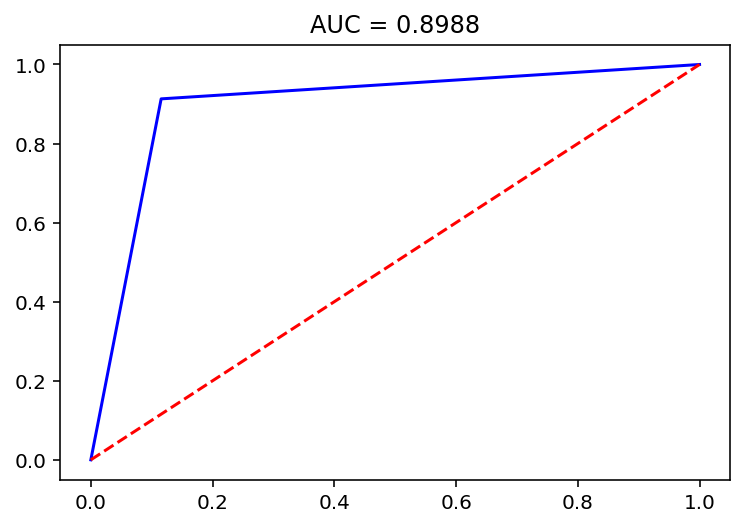

In [8]:
# Get the ROC curve
false_positive_rate, recall, thresholds = roc_curve(y_test, y_test_pred)

# Get the AUC value
auc_value = auc(false_positive_rate, recall)

# Plot the ROC curve and AUC value
plot(false_positive_rate, recall, 'b')
plot([0,1], [0,1], 'r--')
title('AUC = %0.4f' % auc_value)

The results of the logistic regression can be interpreted like the probability of the each value belongs to each class and a value will belong a positive if its probability is greater than a threshold. With the `LogisticRegression` class the threshold is `0.5` and this threshold cannot be changed. If we want to change the threshold, we have to use the `predict_proba()` method and make predictions manually. That method returns a matrix with two colums: the first indicates the probability which the value is false, and the second indicate the probability which the value is true.

Let's go to use this method:

In [9]:
# We use the predict_proba method of the classifier
prob = classifier.predict_proba(x_test)

# Create a matrix of boolean values
y_th = np.ones(len(y_test), dtype=bool)

# Try several thresholds:
for th in (0.9, 0.7, 0.3) :
    # For each value in y_test
    for i in range(len(y_test)) :
        # We want to the probability which the value is true
        y_th[i] = prob[i][1] > th
        
    # Print the metrics for each threshold:
    print(' Accuracy ',th, ': ', accuracy_score(y_test, y_th))
    print(' Precision ',th, ': ', precision_score(y_test, y_th))
    print(' Recall ',th, ': ', recall_score(y_test, y_th))
    print('\n')

 Accuracy  0.9 :  0.8304
 Precision  0.9 :  0.973684210526
 Recall  0.9 :  0.689440993789


 Accuracy  0.7 :  0.9072
 Precision  0.7 :  0.948979591837
 Recall  0.7 :  0.866459627329


 Accuracy  0.3 :  0.88
 Precision  0.3 :  0.829333333333
 Recall  0.3 :  0.965838509317




### Decision Trees 

We are going to use the `DecisionTreeClassifier` given by scikit-learn:

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve, auc

In [11]:
# Create the model
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', # We use Entropy criterion for divide classes
                                        random_state = 1)

# Fit the model, make the predition and print the metrics
dt_classifier.fit(x_train, y_train)
y_train_pred = dt_classifier.predict(x_train)
y_test_pred = dt_classifier.predict(x_test)

print('Trainning metrics:')
print(' Accuracy: ', accuracy_score(y_train, y_train_pred))
print(' Precision: ', precision_score(y_train, y_train_pred))
print(' Recall: ', recall_score(y_train, y_train_pred))

print('\nTesting metrics:')
print(' Accuracy: ', accuracy_score(y_test, y_test_pred))
print(' Precision: ', precision_score(y_test, y_test_pred))
print(' Recall: ', recall_score(y_test, y_test_pred))

Trainning metrics:
 Accuracy:  1.0
 Precision:  1.0
 Recall:  1.0

Testing metrics:
 Accuracy:  0.912
 Precision:  0.908256880734
 Recall:  0.922360248447


As we can observe, the metrics given by the model with the train data are 1, that wants to say that the model is overfitting. That happens because we don't indicate the max depth of the tree. We have to indicate the max depth in the constructor of the tree:

In [12]:
# Create the model
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', # We use Entropy criterion for divide classes
                                        max_depth = 4, # Max depth of the tree
                                        random_state = 1)

# Fit the model, make the predition and print the metrics
dt_classifier.fit(x_train, y_train)
y_train_pred = dt_classifier.predict(x_train)
y_test_pred = dt_classifier.predict(x_test)

print('Trainning metrics:')
print(' Accuracy: ', accuracy_score(y_train, y_train_pred))
print(' Precision: ', precision_score(y_train, y_train_pred))
print(' Recall: ', recall_score(y_train, y_train_pred))

print('\nTesting metrics:')
print(' Accuracy: ', accuracy_score(y_test, y_test_pred))
print(' Precision: ', precision_score(y_test, y_test_pred))
print(' Recall: ', recall_score(y_test, y_test_pred))

Trainning metrics:
 Accuracy:  0.924266666667
 Precision:  0.930540242558
 Recall:  0.914409534128

Testing metrics:
 Accuracy:  0.9024
 Precision:  0.891891891892
 Recall:  0.922360248447


Now, the metrics are more real. Let's to represent the ROC curve and the AUC value:

Text(0.5,1,'AUC = 0.9018')

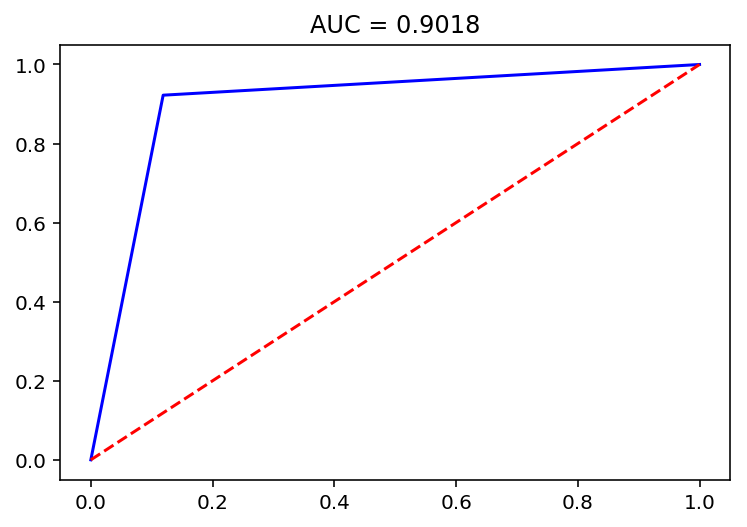

In [13]:
# Get the ROC curve
false_positive_rate, recall, thresholds = roc_curve(y_test, y_test_pred)

# Get the AUC value
auc_value = auc(false_positive_rate, recall)

# Plot the ROC curve and AUC value
plot(false_positive_rate, recall, 'b')
plot([0,1], [0,1], 'r--')
title('AUC = %0.4f' % auc_value)

One of the decision trees features is that the importance of each variable can be obtained. The classifier has the attribute `feature_importances_` which gives us that importance. We are going to use this information for create another classifier without a variable:

In [14]:
# Print the features importances
print('feature_importances_ = ', dt_classifier.feature_importances_, '\n')

# Remove the variable with lower importance
best_features = np.arange(len(dt_classifier.feature_importances_))
best_features = np.delete(best_features, np.argmin(dt_classifier.feature_importances_))

dt_best_features = DecisionTreeClassifier(max_depth = 4,
                                            criterion = 'entropy',
                                            random_state = 1)
# Fit the model with the best features
dt_best_features.fit(x_train[:, best_features], y_train)

# Make the prediction
y_train_best_features_pred = dt_best_features.predict(x_train[:, best_features])
y_test_best_features_pred = dt_best_features.predict(x_test[:, best_features])

print('Trainning metrics:')
print(' Accuracy: ', accuracy_score(y_train, y_train_best_features_pred))
print(' Precision: ', precision_score(y_train, y_train_best_features_pred))
print(' Recall: ', recall_score(y_train, y_train_best_features_pred))

print('\nTesting metrics:')
print(' Accuracy: ', accuracy_score(y_test, y_test_best_features_pred))
print(' Precision: ', precision_score(y_test, y_test_best_features_pred))
print(' Recall: ', recall_score(y_test, y_test_best_features_pred))

feature_importances_ =  [ 0.          0.83530293  0.16469707] 

Trainning metrics:
 Accuracy:  0.924266666667
 Precision:  0.930540242558
 Recall:  0.914409534128

Testing metrics:
 Accuracy:  0.9024
 Precision:  0.891891891892
 Recall:  0.922360248447


Text(0.5,1,'Trainning AUC = 0.9241')

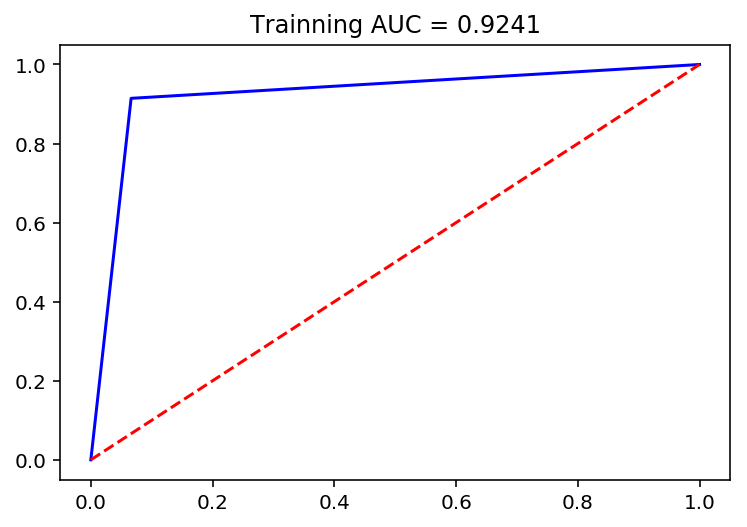

In [15]:
# Get the ROC curve of the traninning
false_positive_rate, recall, thresholds = roc_curve(y_train, y_train_best_features_pred)

# Get the AUC value
auc_value = auc(false_positive_rate, recall)

# Plot the ROC curve and AUC value
plot(false_positive_rate, recall, 'b')
plot([0,1], [0,1], 'r--')
title('Trainning AUC = %0.4f' % auc_value)

Text(0.5,1,'Testing AUC = 0.9018')

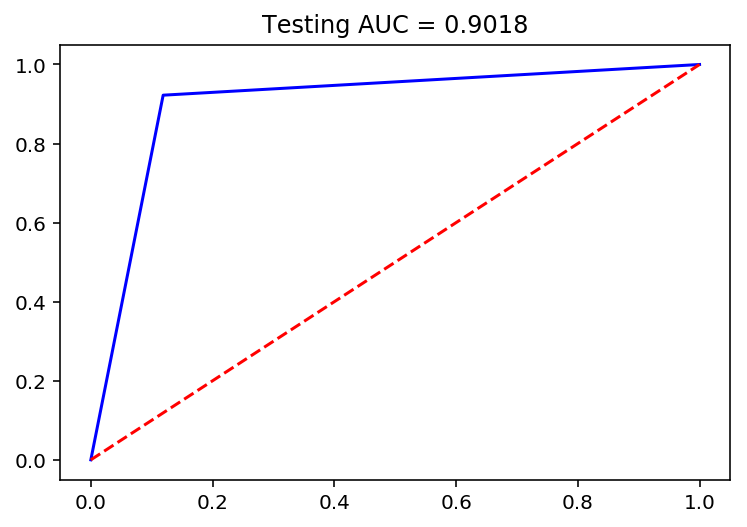

In [16]:
# Get the ROC curve
false_positive_rate, recall, thresholds = roc_curve(y_test, y_test_best_features_pred)

# Get the AUC value
auc_value = auc(false_positive_rate, recall)

# Plot the ROC curve and AUC value
plot(false_positive_rate, recall, 'b')
plot([0,1], [0,1], 'r--')
title('Testing AUC = %0.4f' % auc_value)

We can observe that the results are similar although we remove a variable.

### Random Forest 

Now, we are going to test the `RandomForestClassifier` given by scikit-learn with several examples:

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics  import accuracy_score, precision_score, recall_score
from sklearn.metrics  import roc_curve, auc

Trainning metrics:
 Accuracy:  0.9904
 Precision:  0.993456924755
 Recall:  0.986998916576

Testing metrics:
 Accuracy:  0.9168
 Precision:  0.921875
 Recall:  0.916149068323


Text(0.5,1,'AUC = 0.9168')

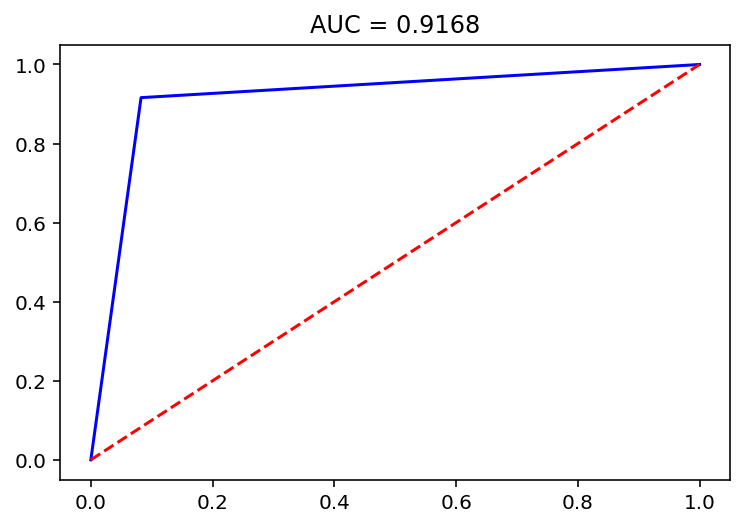

In [18]:
# Model without max_depth
rf_classifier = RandomForestClassifier(criterion = 'entropy',
                                        n_estimators = 10, # Set the number of estimators used
                                        random_state = 1).fit(x_train, y_train)
# Make the predictions
y_train_pred = rf_classifier.predict(x_train)
y_test_pred = rf_classifier.predict(x_test)

print('Trainning metrics:')
print(' Accuracy: ', accuracy_score(y_train, y_train_pred))
print(' Precision: ', precision_score(y_train, y_train_pred))
print(' Recall: ', recall_score(y_train, y_train_pred))

print('\nTesting metrics:')
print(' Accuracy: ', accuracy_score(y_test, y_test_pred))
print(' Precision: ', precision_score(y_test, y_test_pred))
print(' Recall: ', recall_score(y_test, y_test_pred))

# Get the ROC curve
false_positive_rate, recall, thresholds = roc_curve(y_test, y_test_pred)

# Get the AUC value
auc_value = auc(false_positive_rate, recall)

# Plot the ROC curve and AUC value
plot(false_positive_rate, recall, 'b')
plot([0,1], [0,1], 'r--')
title('AUC = %0.4f' % auc_value)

Trainning metrics:
 Accuracy:  0.8928
 Precision:  0.926713947991
 Recall:  0.84940411701

Testing metrics:
 Accuracy:  0.8752
 Precision:  0.896103896104
 Recall:  0.857142857143


Text(0.5,1,'AUC = 0.8758')

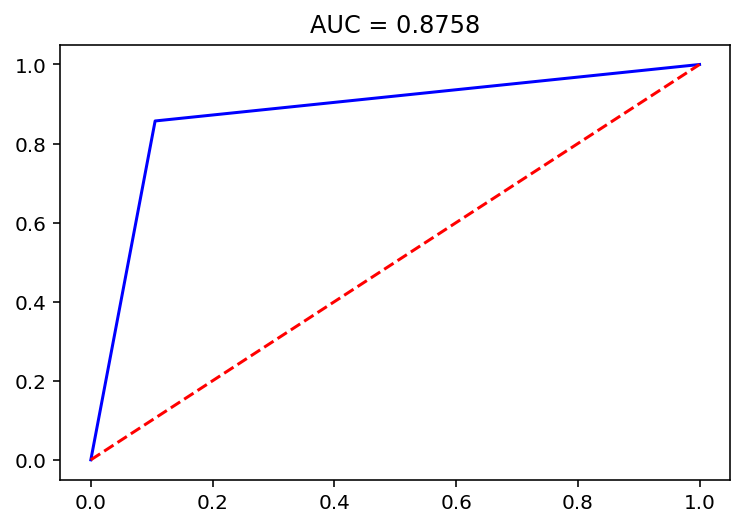

In [19]:
# Model with max_depth
rf_classifier = RandomForestClassifier(criterion = 'entropy',
                                        n_estimators = 10, # Set the number of estimators used
                                        max_depth = 4,
                                        random_state = 1).fit(x_train, y_train)
# Make the predictions
y_train_pred = rf_classifier.predict(x_train)
y_test_pred = rf_classifier.predict(x_test)

print('Trainning metrics:')
print(' Accuracy: ', accuracy_score(y_train, y_train_pred))
print(' Precision: ', precision_score(y_train, y_train_pred))
print(' Recall: ', recall_score(y_train, y_train_pred))

print('\nTesting metrics:')
print(' Accuracy: ', accuracy_score(y_test, y_test_pred))
print(' Precision: ', precision_score(y_test, y_test_pred))
print(' Recall: ', recall_score(y_test, y_test_pred))

# Get the ROC curve
false_positive_rate, recall, thresholds = roc_curve(y_test, y_test_pred)

# Get the AUC value
auc_value = auc(false_positive_rate, recall)

# Plot the ROC curve and AUC value
plot(false_positive_rate, recall, 'b')
plot([0,1], [0,1], 'r--')
title('AUC = %0.4f' % auc_value)

Trainning metrics:
 Accuracy:  0.8944
 Precision:  0.924970691676
 Recall:  0.854821235103

Testing metrics:
 Accuracy:  0.8752
 Precision:  0.891025641026
 Recall:  0.863354037267


Text(0.5,1,'AUC = 0.8756')

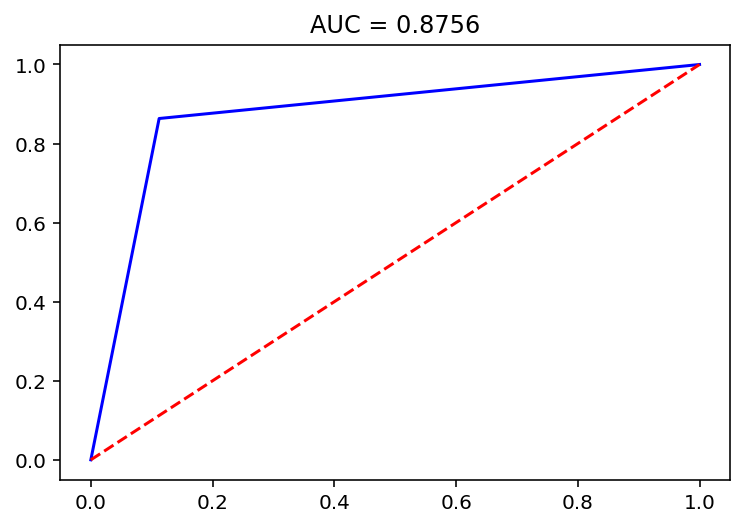

In [20]:
# Model with max_depth
rf_classifier = RandomForestClassifier(criterion = 'entropy',
                                        n_estimators = 40, # Set the number of estimators used
                                        max_depth = 3,
                                        random_state = 1).fit(x_train, y_train)
# Make the predictions
y_train_pred = rf_classifier.predict(x_train)
y_test_pred = rf_classifier.predict(x_test)

print('Trainning metrics:')
print(' Accuracy: ', accuracy_score(y_train, y_train_pred))
print(' Precision: ', precision_score(y_train, y_train_pred))
print(' Recall: ', recall_score(y_train, y_train_pred))

print('\nTesting metrics:')
print(' Accuracy: ', accuracy_score(y_test, y_test_pred))
print(' Precision: ', precision_score(y_test, y_test_pred))
print(' Recall: ', recall_score(y_test, y_test_pred))

# Get the ROC curve
false_positive_rate, recall, thresholds = roc_curve(y_test, y_test_pred)

# Get the AUC value
auc_value = auc(false_positive_rate, recall)

# Plot the ROC curve and AUC value
plot(false_positive_rate, recall, 'b')
plot([0,1], [0,1], 'r--')
title('AUC = %0.4f' % auc_value)

### Support Vector Machines

Now, we are going to test the `SVC` given by scikit-learn:

In [21]:
from sklearn.svm      import SVC
from sklearn.metrics  import accuracy_score, precision_score, recall_score
from sklearn.metrics  import roc_curve, auc

Trainning metrics:
 Accuracy:  0.920533333333
 Precision:  0.912579957356
 Recall:  0.927410617551

Testing metrics:
 Accuracy:  0.9248
 Precision:  0.908011869436
 Recall:  0.950310559006


Text(0.5,1,'AUC = 0.9240')

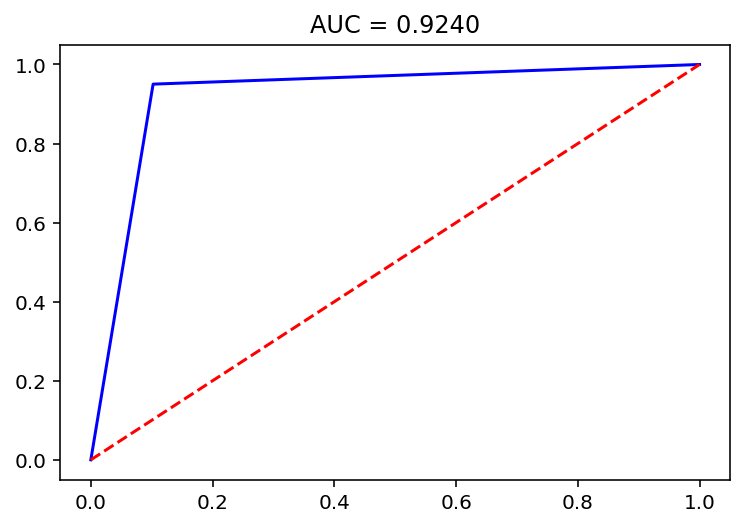

In [22]:
# Create the model and fit it
svm_classifier = SVC().fit(x_train, y_train)

# Make the predictions
y_train_pred = svm_classifier.predict(x_train)
y_test_pred = svm_classifier.predict(x_test)

print('Trainning metrics:')
print(' Accuracy: ', accuracy_score(y_train, y_train_pred))
print(' Precision: ', precision_score(y_train, y_train_pred))
print(' Recall: ', recall_score(y_train, y_train_pred))

print('\nTesting metrics:')
print(' Accuracy: ', accuracy_score(y_test, y_test_pred))
print(' Precision: ', precision_score(y_test, y_test_pred))
print(' Recall: ', recall_score(y_test, y_test_pred))

# Get the ROC curve
false_positive_rate, recall, thresholds = roc_curve(y_test, y_test_pred)

# Get the AUC value
auc_value = auc(false_positive_rate, recall)

# Plot the ROC curve and AUC value
plot(false_positive_rate, recall, 'b')
plot([0,1], [0,1], 'r--')
title('AUC = %0.4f' % auc_value)

### Naïve Bayes Classifier

Now, we are going to test the `naive_bayes` given by scikit-learn:

In [23]:
from sklearn          import naive_bayes
from sklearn.metrics  import accuracy_score, precision_score, recall_score
from sklearn.metrics  import roc_curve, auc

Trainning metrics:
 Accuracy:  0.8896
 Precision:  0.886609071274
 Recall:  0.889490790899

Testing metrics:
 Accuracy:  0.8848
 Precision:  0.865497076023
 Recall:  0.919254658385


Text(0.5,1,'AUC = 0.8837')

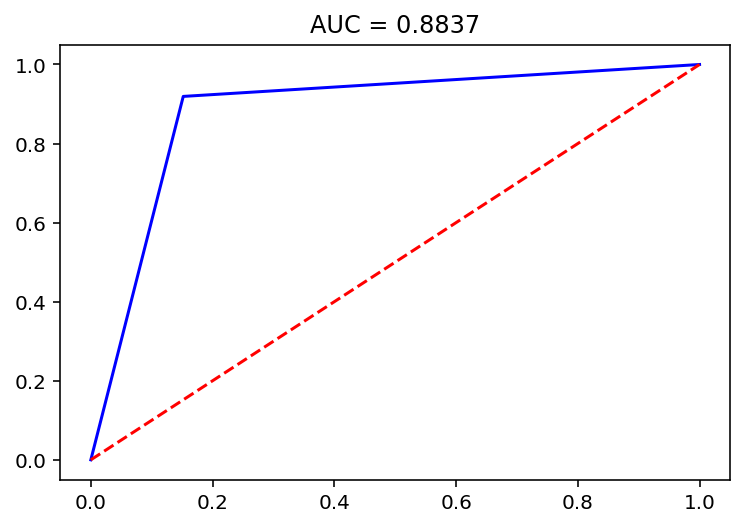

In [24]:
# Create the model and fit it
nb_classifier = naive_bayes.GaussianNB().fit(x_train, y_train)

# Make the predictions
y_train_pred = nb_classifier.predict(x_train)
y_test_pred = nb_classifier.predict(x_test)

print('Trainning metrics:')
print(' Accuracy: ', accuracy_score(y_train, y_train_pred))
print(' Precision: ', precision_score(y_train, y_train_pred))
print(' Recall: ', recall_score(y_train, y_train_pred))

print('\nTesting metrics:')
print(' Accuracy: ', accuracy_score(y_test, y_test_pred))
print(' Precision: ', precision_score(y_test, y_test_pred))
print(' Recall: ', recall_score(y_test, y_test_pred))

# Get the ROC curve
false_positive_rate, recall, thresholds = roc_curve(y_test, y_test_pred)

# Get the AUC value
auc_value = auc(false_positive_rate, recall)

# Plot the ROC curve and AUC value
plot(false_positive_rate, recall, 'b')
plot([0,1], [0,1], 'r--')
title('AUC = %0.4f' % auc_value)